In [1]:
from autograd import *
from matplotlib import pyplot as plt
import numpy as np

np.random.seed(42)

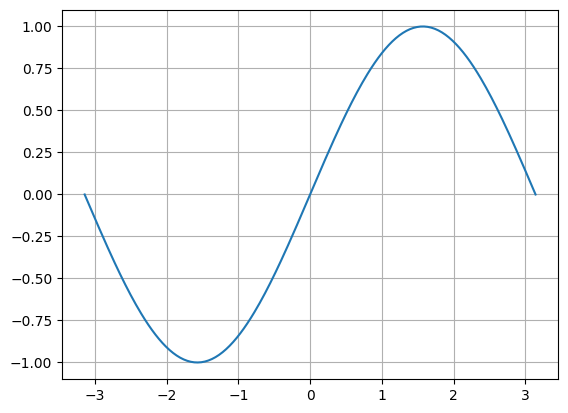

In [2]:
pi = np.pi
X = np.linspace(-pi, pi, 256)
Y = np.sin(X)
X_a = X.copy()
Y_a = Y.copy()

plt.plot(X, Y)
plt.grid()
plt.show()
plt.close()

In [3]:
class Linear():
    def __init__(self, in_dim, out_dim):
        lim = 6 / (in_dim + out_dim)
        w = np.random.uniform(-lim, lim, (in_dim, out_dim))
        b = np.random.uniform(-lim, lim, (1, out_dim))
        self.w = DataNode(Tensor.from_numpy(w))
        self.b = DataNode(Tensor.from_numpy(b))
        self.parameters = [self.w, self.b]
    
    def forward(self, x):
        return DataNode.matmul(x, self.w) + self.b

    def update(self, lr: float):
        self.w.tensor -= self.w.grad * lr
        self.b.tensor -= self.b.grad * lr

In [4]:
hidden_size = 64
lin1 = Linear(1, hidden_size)
lin2 = Linear(hidden_size, 32)
lin3 = Linear(32, 1)

X = DataNode(Tensor.from_numpy(X.reshape(-1, 1)))
print(X.shape())
Y = DataNode(Tensor.from_numpy(Y.reshape(-1, 1)))
print(Y.shape())

[256, 1]
[256, 1]


In [ ]:
loss_tol = 0.01
lr = 1e-4
max_iter: int = 200
item = float('inf')
count = 0

for _ in range(max_iter):
    x1 = lin1.forward(X)
    x2 = DataNode.relu(x1)
    x3 = lin2.forward(x2)
    x4 = DataNode.relu(x3)
    out = lin3.forward(x4)

    l = out - Y
    loss = l * l
    prev_item = item
    item = Tensor.sum_all(loss.tensor) / 2 /  len(X.tensor)
    print(round(item, 4))
    if item > prev_item:
        count += 1
        if count > 5:
            break

    if item < loss_tol:
        break

    loss.backward()

    lin2.update(lr)
    lin1.update(lr)
    DataNode.zero_grad()

In [6]:
x1 = lin1.forward(X)
x2 = DataNode.relu(x1)
x3 = lin2.forward(x2)
x4 = DataNode.relu(x3)
out = lin3.forward(x4)

Y_pred = np.array(out.tensor)

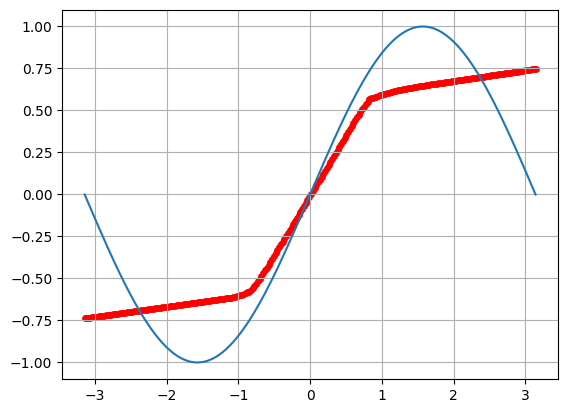

In [7]:
plt.plot(X_a, Y_a)
plt.scatter(X_a, Y_pred, color='red', sizes=np.array([15]))
plt.grid()
plt.show()
plt.close()